In [1]:
with open('harrypotter.txt', 'r', encoding='utf-8') as f:
    hp = f.read()

In [2]:
print("length of dataset in characters", len(hp))

length of dataset in characters 6435489


In [3]:
print(hp[:1000])

Chapter : THE BOY WHO LIVED .
Mr and Mrs Dursley , of number four , Privet Drive , were proud to say that they were perfectly normal , thank you very much .
They were the last people you'd expect to be involved in anything strange or mysterious , because they just didn't hold with such nonsense .
Mr Dursley was the director of a firm called Grunnings , which made drills .
He was a big , beefy man with hardly any neck , although he did have a very large mustache .
Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck , which came in very useful as she spent so much of her time craning over garden fences , spying on the neighbors .
The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere .
The Dursleys had everything they wanted , but they also had a secret , and their greatest fear was that somebody would discover it .
They didn't think they could bear it if anyone found out about the Potters .
Mrs Potter was Mrs Dursley's 

In [4]:
chars = sorted(list(set(hp)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"&'(),.0123456789:?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
74


In [5]:
#tokenize the input text
#tokenize = convert raw text strings to a sequence
#create mapping from characters to integers
string_to_index = {ch:i for i, ch in enumerate(chars)}
index_to_string = {i: ch for i, ch in enumerate(chars)}
encode = lambda s: [string_to_index[ch] for ch in s] #encode: take a string, output a list of integers of that string
decode = lambda l: ''.join([index_to_string[i] for i in l]) #decoder:  take a list of integers (encoded integers), output string

print(encode("Ivan loves Harry Potter"))
print(decode(encode("but likes also LOTR")))

[30, 69, 48, 61, 1, 59, 62, 69, 52, 66, 1, 29, 48, 65, 65, 72, 1, 37, 62, 67, 67, 52, 65]
but likes also LOTR


In [6]:
import torch
data = torch.tensor(encode(hp), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([6435489]) torch.int64
tensor([24, 55, 48, 63, 67, 52, 65,  1, 20,  1, 41, 29, 26,  1, 23, 36, 46,  1,
        44, 29, 36,  1, 33, 30, 43, 26, 25,  1,  9,  0, 34, 65,  1, 48, 61, 51,
         1, 34, 65, 66,  1, 25, 68, 65, 66, 59, 52, 72,  1,  8,  1, 62, 53,  1,
        61, 68, 60, 49, 52, 65,  1, 53, 62, 68, 65,  1,  8,  1, 37, 65, 56, 69,
        52, 67,  1, 25, 65, 56, 69, 52,  1,  8,  1, 70, 52, 65, 52,  1, 63, 65,
        62, 68, 51,  1, 67, 62,  1, 66, 48, 72,  1, 67, 55, 48, 67,  1, 67, 55,
        52, 72,  1, 70, 52, 65, 52,  1, 63, 52, 65, 53, 52, 50, 67, 59, 72,  1,
        61, 62, 65, 60, 48, 59,  1,  8,  1, 67, 55, 48, 61, 58,  1, 72, 62, 68,
         1, 69, 52, 65, 72,  1, 60, 68, 50, 55,  1,  9,  0, 41, 55, 52, 72,  1,
        70, 52, 65, 52,  1, 67, 55, 52,  1, 59, 48, 66, 67,  1, 63, 52, 62, 63,
        59, 52,  1, 72, 62, 68,  5, 51,  1, 52, 71, 63, 52, 50, 67,  1, 67, 62,
         1, 49, 52,  1, 56, 61, 69, 62, 59, 69, 52, 51,  1, 56, 61,  1, 48, 61,
      

In [7]:
#let's now split up the data into train and validation sets
#will help us to understand how much our model is overfitting
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [8]:
block_size = 8
print(train_data[:block_size+1])
decode(train_data[:block_size+1].tolist())

tensor([24, 55, 48, 63, 67, 52, 65,  1, 20])


'Chapter :'

In [9]:
x = train_data[:block_size]
print(x)
y = train_data[1:block_size+1]
print(y)
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target is: {target}")

tensor([24, 55, 48, 63, 67, 52, 65,  1])
tensor([55, 48, 63, 67, 52, 65,  1, 20])
when input is tensor([24]) the target is: 55
when input is tensor([24, 55]) the target is: 48
when input is tensor([24, 55, 48]) the target is: 63
when input is tensor([24, 55, 48, 63]) the target is: 67
when input is tensor([24, 55, 48, 63, 67]) the target is: 52
when input is tensor([24, 55, 48, 63, 67, 52]) the target is: 65
when input is tensor([24, 55, 48, 63, 67, 52, 65]) the target is: 1
when input is tensor([24, 55, 48, 63, 67, 52, 65,  1]) the target is: 20


In [10]:
torch.manual_seed(42)
batch_size = 4 #how many independent sequences will we process parallel
block_size = 8 #what is the maximum context size for predictions?
def get_batch(split):
    #generate a small batch of data
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data)-block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y
xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

for b in range(batch_size):
    for t in range(block_size):
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target is: {target}")
        print(f"{decode(context.tolist())} ----> {decode([target.item()])}")

inputs:
torch.Size([4, 8])
tensor([[60, 60, 52, 51, 56, 48, 67, 52],
        [ 8,  1, 67, 55, 48, 61, 58,  1],
        [52, 63, 52, 65,  1, 56, 61, 67],
        [62, 59, 51,  1, 70, 56, 73, 48]])
targets:
torch.Size([4, 8])
tensor([[60, 52, 51, 56, 48, 67, 52, 59],
        [ 1, 67, 55, 48, 61, 58,  1, 72],
        [63, 52, 65,  1, 56, 61, 67, 62],
        [59, 51,  1, 70, 56, 73, 48, 65]])
when input is [60] the target is: 60
m ----> m
when input is [60, 60] the target is: 52
mm ----> e
when input is [60, 60, 52] the target is: 51
mme ----> d
when input is [60, 60, 52, 51] the target is: 56
mmed ----> i
when input is [60, 60, 52, 51, 56] the target is: 48
mmedi ----> a
when input is [60, 60, 52, 51, 56, 48] the target is: 67
mmedia ----> t
when input is [60, 60, 52, 51, 56, 48, 67] the target is: 52
mmediat ----> e
when input is [60, 60, 52, 51, 56, 48, 67, 52] the target is: 59
mmediate ----> l
when input is [8] the target is: 1
, ---->  
when input is [8, 1] the target is: 67
,  ----

In [11]:
print(xb)

tensor([[60, 60, 52, 51, 56, 48, 67, 52],
        [ 8,  1, 67, 55, 48, 61, 58,  1],
        [52, 63, 52, 65,  1, 56, 61, 67],
        [62, 59, 51,  1, 70, 56, 73, 48]])


In [12]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(42) #hitchhiker's guide to galaxy
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        #each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    def forward(self, idx, targets=None):
        #idx and targets are (Batch, Time) tensor of integers
        logits = self.token_embedding_table(idx) #(Batch,Time,Channel)
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets) 
        return logits, loss

    def generate(self, idx, max_new_tokens):
        #idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            #get the predictions
            logits, loss = self(idx)
            #focus only the last time step
            logits = logits[:, -1, :] #becomes (B, C)
            #apply softmax to get probabilities
            probs = F.softmax(logits, dim=1) # (B, C)
            #sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) #(B, 1)
            #append sampled index to the runnning sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

idx = torch.zeros((1,1), dtype=torch.long)
print(idx)
idx = m.generate(idx = idx, max_new_tokens=100)
print(idx[0])
print(decode(idx[0].tolist()))

torch.Size([32, 74])
tensor(4.9733, grad_fn=<NllLossBackward0>)
tensor([[0]])
tensor([ 0, 61, 53, 10, 22, 67,  5, 63, 20, 30, 31, 36, 28, 45,  8, 70, 56, 11,
        15, 35, 14, 59, 41, 27, 17, 64, 25, 65, 17,  1, 14,  4,  0, 24, 57, 68,
         1, 65, 69, 12, 39, 33, 54, 50, 49, 23, 53, 10, 19, 34, 17, 54, 61, 30,
        45, 20, 69, 73, 23, 29, 43, 43, 20, 52, 45, 71, 71, 22,  9, 23, 13, 27,
        46, 19, 71, 28, 57, 46, 24,  4,  6, 62, 16, 30,  4, 31, 23, 40, 45, 22,
         9,  6, 32, 31, 54, 73,  4, 70, 47, 39, 42])

nf0At'p:IJOGX,wi15N4lTF7qDr7 4&
Cju rv2RLgcbBf09M7gnIX:vzBHVV:eXxxA.B3FY9xGjYC&(o6I&JBSXA.(KJgz&wZRU


In [13]:
#create pytorch optimizer
#similar to stochastic grad, but more powerful, good fit for small models
optimizer = torch.optim.AdamW(m.parameters(), lr =1e-3)

In [14]:
batch_size = 32
for steps in range(10000):
    #sample a batch of data
    xb, yb = get_batch('train')

    #evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    
print(loss.item())

2.303614616394043


In [15]:
idx = torch.zeros((1,1), dtype=torch.long)
print(idx)
idx = m.generate(idx = idx, max_new_tokens=400)
print(idx[0])
print(decode(idx[0].tolist()))

tensor([[0]])
tensor([ 0,  3,  1, 29, 48, 51, 52,  1, 67, 65, 52,  1, 59, 51,  1, 67, 66,  1,
        67,  1, 52,  1, 50, 62, 68, 60, 48, 65, 52, 58, 52, 61, 54,  1, 55, 67,
         1, 21,  1, 44, 55,  1, 49, 48,  1, 66,  1, 68, 65, 58, 52, 51, 51,  1,
        68, 65,  1, 30, 67, 55, 56, 67, 55, 56, 67, 68, 51,  1, 67, 55, 62, 48,
        51, 59, 52,  1, 58,  1, 48, 65, 72,  1, 21,  0, 34, 50, 55,  1, 60,  1,
         2,  1, 41, 55, 67,  1,  8,  1, 53, 10, 27, 65, 66, 48, 66,  1, 55, 48,
        54, 65, 66, 67, 68, 67, 56, 61, 54, 56, 69, 56, 67,  1, 39, 62, 53, 52,
        51, 58,  1, 68, 66, 66, 67, 55, 56, 61,  1, 48, 66,  1, 29, 52, 51, 62,
        68, 66, 63, 59, 52,  1, 67, 70, 52, 51,  1, 70, 48, 56, 49, 48, 65, 70,
        52,  1, 62,  1, 48, 65,  1, 25, 48,  1, 49, 52, 51,  1,  8,  1, 48, 65,
        46, 62, 70, 59, 51, 56, 61,  1, 49, 67, 62, 62, 61, 51,  1, 67, 65, 52,
         1, 50, 58,  1, 49, 59, 52,  1, 51, 52, 51,  1, 55, 56, 51,  1,  9,  0,
         3,  1, 69, 48, 65

In [16]:
#it's better but we need the tokens to star talking each other we only infering based on the last 
#SNe ad hede . he wanglevecre , ve heslul -> s
#to next characters so that's where transform enter

The mathematical trick in self-attention

In [17]:
#consider the following toy example_:
torch.manual_seed(1337)
B, T, C = 4, 8, 2 #batch, time, channels
x = torch.randn(B, T, C)
x.shape

torch.Size([4, 8, 2])

In [18]:
#goal is that tokens communicate with the past that's why we take the mean of everything
# before the token we are working in the
#e.g. [1,2,3,4,5,6, ...]
#we are at token 5 we only comunicate with [1,2,3,4] taking the mean value
xback_of_words = torch.zeros((B,T, C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] #(t,C)
        xback_of_words[b, t] = torch.mean(xprev, 0)

In [19]:
xback_of_words[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [20]:
x[0]

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [21]:
#more efficient
torch.manual_seed(1337)
a = torch.tril(torch.ones(3,3))  #torch.ones(3,3)
a = a / torch.sum(a,1, keepdim=True)
b = torch.randint(0, 10, (3,2)).float()
c = a @ b
print('a=')
print(a)
print('b=')
print(b)
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
b=
tensor([[5., 7.],
        [2., 0.],
        [5., 3.]])
c=
tensor([[5.0000, 7.0000],
        [3.5000, 3.5000],
        [4.0000, 3.3333]])


In [22]:
#consider the following toy example_:
torch.manual_seed(1337)
B, T, C = 4, 8, 2 #batch, time, channels
x = torch.randn(B, T, C)
print(x.shape)
xback_of_words = torch.zeros((B,T, C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] #(t,C)
        xback_of_words[b, t] = torch.mean(xprev, 0)
        
wei = torch.tril(torch.ones(T,T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x #(B,T,T)@ (B,T,C) ---> (B,T,C)
torch.allclose(xback_of_words.float(), xbow2.float(), atol=1e-7, rtol=1e-5)
#diagnose(xback_of_words, xbow2)
#for i in range(8):
#    eq = torch.allclose(xback_of_words[1][i], xbow2[1][i])
#    print(eq)
#    if not eq:
#        print(xback_of_words[1][i])
#        print(xbow2[1][i])

torch.Size([4, 8, 2])


True

## 1. It represents cumulative sums (discrete integration)

If you multiply it by a vector  

\[
x = (x_1, x_2, x_3)^T
\]

then:

\[
Lx =
\begin{bmatrix}
x_1 \\
x_1 + x_2 \\
x_1 + x_2 + x_3
\end{bmatrix}
\]

So **\(L\)** performs a **prefix sum**.

This is the discrete analogue of:

- integration  
- accumulation  
- state evolution over time  

That’s why it appears in:

- difference equations  
- time-series models  
- numerical methods  
- signal processing  

In your broader interests (**control, dynamics, ML**), this operator is fundamental.


In [23]:
def diagnose(a, b, name_a="a", name_b="b"):
    print("shape:", a.shape, b.shape)
    print("dtype:", a.dtype, b.dtype)
    print("device:", a.device, b.device)
    print("requires_grad:", a.requires_grad, b.requires_grad)

    # Handle NaNs/Infs explicitly
    print("has_nan:", torch.isnan(a).any().item(), torch.isnan(b).any().item())
    print("has_inf:", torch.isinf(a).any().item(), torch.isinf(b).any().item())

    # Compare
    diff = (a - b).abs()
    print("max_abs_diff:", diff.max().item())
    print("allclose default:", torch.allclose(a, b))
    print("allclose strict (atol=0, rtol=0):", torch.allclose(a, b, atol=0.0, rtol=0.0))

    # Show where it fails
    close_mask = torch.isclose(a, b)
    if close_mask.numel() > 0:
        bad = (~close_mask).nonzero(as_tuple=False)
        if bad.numel() > 0:
            i = bad[0].tolist()
            print("first mismatch index:", i)
            print(f"{name_a}[i] =", a[tuple(i)].item())
            print(f"{name_b}[i] =", b[tuple(i)].item())
            print("abs diff at i:", (a[tuple(i)] - b[tuple(i)]).abs().item())

In [24]:
#3rd version
tril = torch.tril(torch.ones(T,T)) # using to accumalitive how much each token knows from each other
wei = torch.zeros((T,T)) #"standard" way to initializes values, all from 'zeros' mean nothing to accumalate, all have the same knowledge at the beggining
#remember these are your weights
wei = wei.masked_fill(tril == 0, float('-inf')) #since we are using a triangular lower form, tokens in the future cannot communicate
#all values that are as '-inf', are values from the future
wei = F.softmax(wei, dim=-1)#normalize the values
xbow3 = wei @ x #give us the current knowledge on x

In [25]:
#version 4th
torch.manual_seed(1337)
B,T,C = 4,8,32 #batch, time, channels -> batch, block_size (context), n_embeding
x = torch.randn(B,T,C)

#let's see a single Head perform self-attention
#why we want this because the last version:
#tril = torch.tril(torch.ones(T,T))
#wei = torch.zeros((T,T)) 
#wei = wei.masked_fill(tril == 0, float('-inf'))
#Creates a uniform lowe triangular matrix that gives all the same probabilities
#we don't won't than since not all have the same probabilities and speaking gramatically
#e.g. vowels does not usually follow more vowels, we have to look for consonants 
#but not any consonants
#self-attention allows this
#use a key -> query implementation similar to index search systems
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x) # (B,T,16)
q = query(x) #(B, T, 16)
wei = q @ k.transpose(-2, -1) #(B,T, 16) @ (B, 16, T) ---> (B, T, T)
#this matrix multiplication have to do with "dot product" theory, 
#search for for better foundation
#in essence allows to make high affinity, so with softmax add the whole information from the til current position


tril = torch.tril(torch.ones(T,T))
#wei = torch.zeros((T,T)) 
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)#normalize the values

v = value(x)
out = wei @ v
#out = wei @ x 

out.shape

torch.Size([4, 8, 16])

In [26]:
#you can see better here why the transpose
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

In [27]:
#"you need gaussian values so we need zero mean and unit variance, if we do weight naivly
#weight variance will be on the order of head size
k = torch.randn(B,T, head_size)
q = torch.randn(B, T, head_size)
#square root it's used to control variance after initialization
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [28]:
k.var()

tensor(1.0449)

In [29]:
q.var()

tensor(1.0700)

In [30]:
wei.var()

tensor(1.0918)

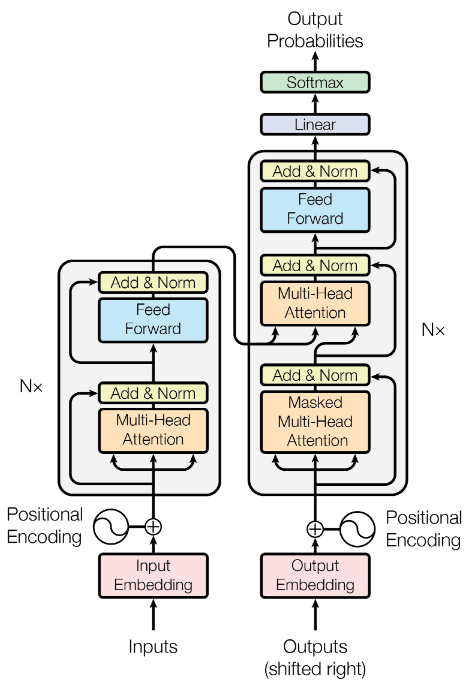

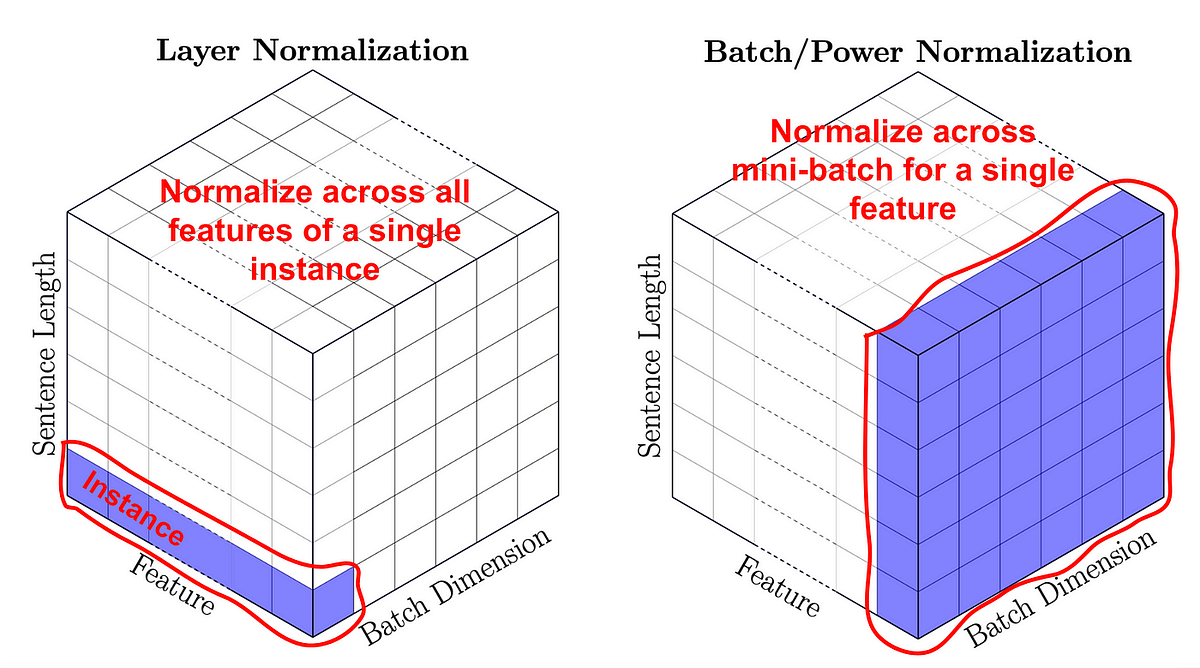

In [35]:
class BatchNorm1d:

    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.eps = eps
        self.momentum = momentum
        self.training = True
        #parameters (trained with backprop)
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
        #buffers (trained with a running 'momentum update')
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)

    def __call__(self, x):
        #calculate the forward pass
        if self.training:
            if x.ndim == 2:
                dim = 1 #if we change this to 0 it converts into BatchNormal
            elif x.ndim == 3:
                dim = (0,1)
            xmean = x.mean(dim, keepdim = True) #batch mean
            xvar = x.var(dim, keepdim = True, unbiased = True) #batch variance
        else:
            xmean = self.running_mean
            xvar = self.running_var
        xhat = (x - xmean) / torch.sqrt(xvar + self.eps) #normalize to unit variance
        self.out = self.gamma * xhat + self.beta
        #update buffers
        if self.training:
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

torch.manual_seed(1337)
module = BatchNorm1d(100)
x = torch.randn(32,100) #batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [36]:
#with batch we normalize the rows, with layer we normalize the columns
x[:,0].mean(), x[:,0].std() #mean, std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [37]:
x[0,:].mean(), x[0,:].std() #mean, std of one single feature

(tensor(-9.5367e-09), tensor(1.0000))

In [38]:
class BatchNorm1d:

    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.eps = eps
        #parameters (trained with backprop)
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)

    def __call__(self, x):
        #calculate the forward pass
        dim = 1
        xmean = x.mean(dim, keepdim = True) #batch mean
        xvar = x.var(dim, keepdim = True, unbiased = True) #batch variance
        xhat = (x - xmean) / torch.sqrt(xvar + self.eps) #normalize to unit variance
        self.out = self.gamma * xhat + self.beta
        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

torch.manual_seed(1337)
module = BatchNorm1d(100)
x = torch.randn(32,100) #batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])